<a href="https://colab.research.google.com/github/Noob919/Diabetes_Predictions/blob/main/Models/foward_selection/Decisoon_tree_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
path = "https://raw.githubusercontent.com/Noob919/Diabetes_Predictions/main/DataUsed/diabetes_binary_health_indicators_BRFSS2015.csv"
df =  pd.read_csv(path)
Scaler = StandardScaler()
X =  df.drop('Diabetes_binary', axis =1)
y = df['Diabetes_binary']
X_scaler = Scaler.fit_transform(X)

In [3]:
clflr = DecisionTreeClassifier()

In [4]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [6]:
sfs = SFS(clflr, 
           k_features= (1,21), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3).fit(X_scaler,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    7.1s finished

[2022-07-23 21:58:15] Features: 1/21 -- score: 0.8606669820245979[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    9.5s finished

[2022-07-23 21:58:24] Features: 2/21 -- score: 0.8606669820245979[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.1s finished

[2022-07-23 21:58:29] Features: 3/21 -- score: 0.8614632608010092[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [7]:
info = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
info.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.8606669820245979, 0.8606669820245979, 0.860...",0.860667,"(0,)",0.0,0.0,0.0
2,"(0, 1)","[0.8606669820245979, 0.8606669820245979, 0.860...",0.860667,"(0, 1)",0.0,0.0,0.0
3,"(0, 1, 3)","[0.860879848628193, 0.8615066225165563, 0.8620...",0.861463,"(0, 1, 3)",0.001034,0.00046,0.000325
4,"(0, 1, 3, 13)","[0.8636707663197729, 0.8642029328287606, 0.864...",0.86414,"(0, 1, 3, 13)",0.00081,0.00036,0.000255
5,"(0, 1, 3, 10, 13)","[0.8640373699148534, 0.864131977294229, 0.8647...",0.864305,"(0, 1, 3, 10, 13)",0.000708,0.000315,0.000222


In [8]:
list_f = X.columns[[sfs.k_feature_idx_]]
list_f

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['HighBP', 'HighChol', 'BMI', 'HvyAlcoholConsump', 'GenHlth'], dtype='object')

In [9]:
sfs.k_score_

0.8643054241564174

In [10]:
df_f = X[list_f]
df_f.shape
X_f =  df_f
y = df['Diabetes_binary']
X_train_f, X_test_f, y_train, y_test = train_test_split(X_f, y, test_size=0.3, random_state=42)

In [11]:
X_train_f = Scaler.fit_transform(X_train_f)
X_test_f = Scaler.fit_transform(X_test_f) 
print("Shape of train set",X_train_f.shape)
print("Shape of test set",X_test_f.shape)

Shape of train set (177576, 5)
Shape of test set (76104, 5)


In [14]:
clflr = DecisionTreeClassifier()
clflr.fit(X_train_f, y_train)
pred  = clflr.predict(X_test_f)
print("Accuracy Score",accuracy_score(y_test,pred))
print("f1 Score",f1_score(y_test,pred))
print("Recall Score", recall_score(y_test,pred))
print('Precison Score', precision_score(y_test,pred))

Accuracy Score 0.8650399453379586
f1 Score 0.19726455646737007
Recall Score 0.12020192399276121
Precison Score 0.5496515679442509


Text(0.5, 1.0, 'Confusion metrics for Decision Tree on Test Set')

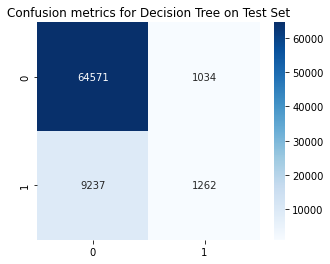

In [15]:
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Blues')
plt.title('Confusion metrics for Decision Tree on Test Set')

Accuracy Score 0.8662319232328693
f1 Score 0.21323529411764708
Recall Score 0.1295528635247716
precison Score 0.602245088868101


Text(0.5, 1.0, 'Confusion metrics for Decision Tree on Train set')

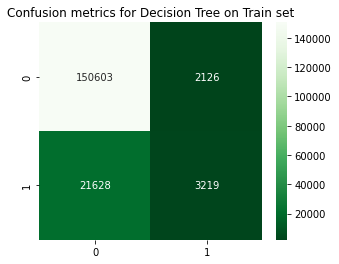

In [17]:
pred_train  = clflr.predict(X_train_f)
print("Accuracy Score",accuracy_score(y_train, pred_train))
print("f1 Score",f1_score(y_train, pred_train ))
print("Recall Score", recall_score(y_train, pred_train ))
print('precison Score', precision_score(y_train, pred_train ))
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_train, pred_train)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Greens_r')
plt.title('Confusion metrics for Decision Tree on Train set')

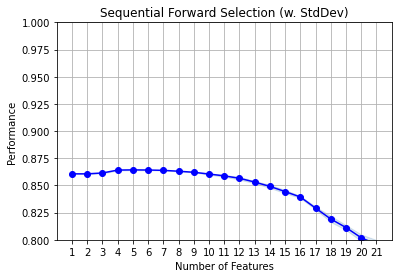

In [18]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()